# Imports, function definitions and assumptions

In [38]:
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import latex

sp.init_printing(use_latex=True)

def sind(angle):
    angle_radians = angle * math.pi/ 180
    result = math.sin(angle_radians)
    return(result)

def cosd(angle):
    angle_radians = angle * math.pi/ 180
    result = math.cos(angle_radians)
    return(result)

# All efforts are measured in Newtons
Park_peak = 18.0
Reverse_peak = 18.0
Neutral_peak = 18.0
Drive_peak = 18.0

friction = 10

# All displacements are in degrees
# These locations are in stable equilibrium by design
park_position = 0
reverse_position = 13
neutral_position = 21.5
drive_position = 30

# These locations are in unstable equilibrium. The effort is momentarily 0 effort vector changes direction
P_R_breakover = (reverse_position - park_position)/2 + park_position
R_N_breakover = (neutral_position-reverse_position)/2 + reverse_position
N_D_breakover = (drive_position-neutral_position)/2 + neutral_position

# These locations are those of max positive and negative effort
P_neg = (P_R_breakover - park_position)/2 + park_position
P_pos = (reverse_position - P_R_breakover)/2 + P_R_breakover
R_neg = (R_N_breakover-reverse_position)/2 + reverse_position
R_pos = (neutral_position-R_N_breakover)/2 + R_N_breakover
N_neg = (N_D_breakover-neutral_position)/2 + neutral_position
N_pos = (drive_position-N_D_breakover)/2 + N_D_breakover
D_neg = (31)

print("{:4.2f},{:4.2f},{:4.2f}".format(P_R_breakover, R_N_breakover, N_D_breakover))
print("\n{:4.2f},{:4.2f},{:4.2f},{:4.2f},{:4.2f},{:4.2f},{:4.2f}".format(P_neg, P_pos, R_neg, R_pos, N_neg, N_pos, D_neg))

6.50,17.25,25.75

3.25,9.75,15.12,19.38,23.62,27.88,31.00


# Construct effort graphs
Build Park-rearward (aft) graph followed by Drive-forward (fore) graph and then splice them together.

In [39]:
theta, N = sp.symbols('theta N')
effort_expr = (theta-park_position)*(theta-reverse_position)*(theta-neutral_position)*(theta-drive_position)*(theta-P_R_breakover)*(theta-R_N_breakover)*(theta-N_D_breakover)
sp.pprint(sp.expand(effort_expr))

 7          6              5                4                   3             
θ  - 114.0⋅θ  + 5230.9375⋅θ  - 123017.8125⋅θ  + 1552570.328125⋅θ  - 9863368.73

      2                   
4375⋅θ  + 24209329.21875⋅θ


# Manipulate the expression

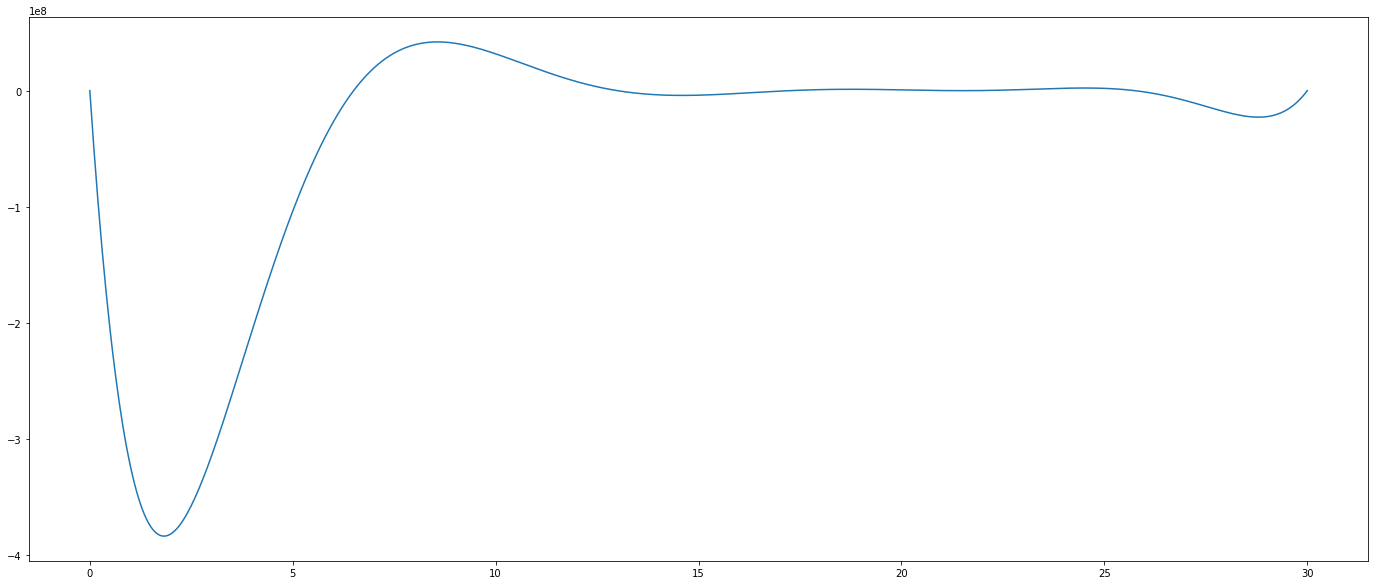

In [40]:
dtheta = 0.05
fan_angle = 30
angle_data = np.arange(0,fan_angle+dtheta,dtheta)

effort_list = []
effort_expr *= (theta-neutral_position)
for a in angle_data:
    effort_list.append(effort_expr.subs(theta,a))
    
effort_graph = [angle_data,effort_list]
Figure, axes = plt.subplots(1,1,figsize=(24,10))
axes.plot(effort_graph[0],effort_graph[1])

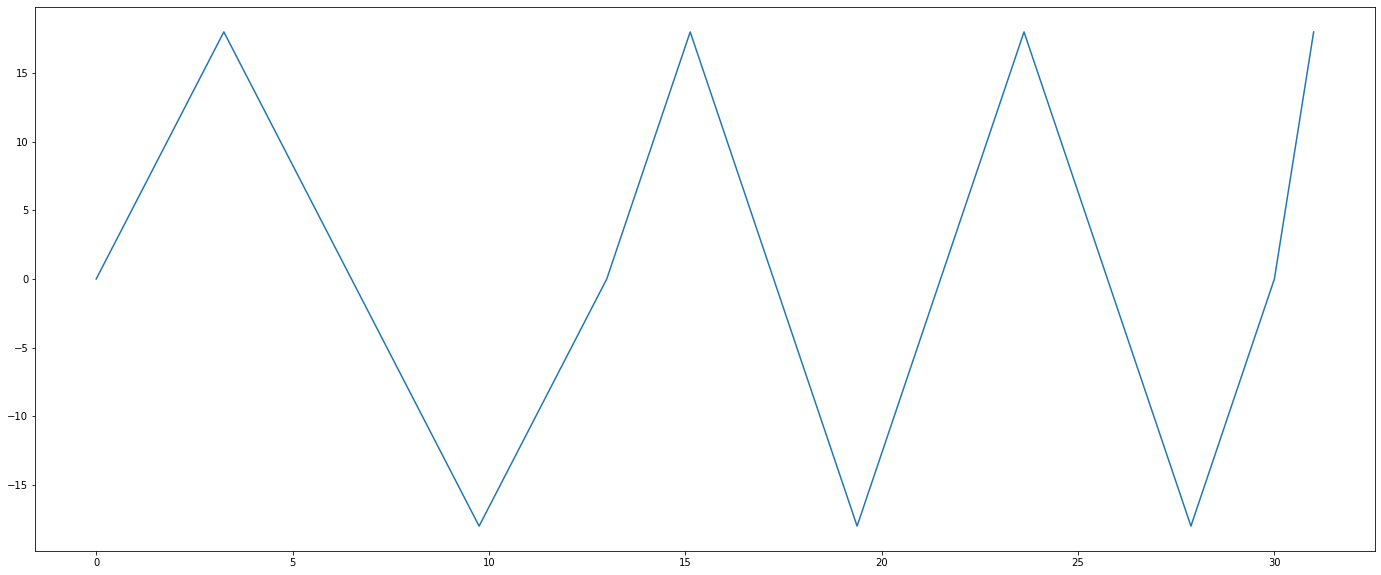

In [41]:
manual_theta = [park_position,
                P_neg,
                P_R_breakover,
                P_pos,
                reverse_position,
                R_neg,
                R_N_breakover,
                R_pos,
                neutral_position,
                N_neg,
                N_D_breakover,
                N_pos,
               drive_position,
               D_neg]

manual_effort = [0,
                 Park_peak,
                 0,
                 -1*Park_peak,
                 0,
                 Reverse_peak,
                 0,
                 -1*Reverse_peak,
                 0,
                 Neutral_peak,
                 0,
                 -1*Neutral_peak,
                 0,
                Drive_peak]

fig,ax = plt.subplots(1,1,figsize=(24,10))
ax.plot(manual_theta, manual_effort)

Text(15.375, -5.0, '( A )')

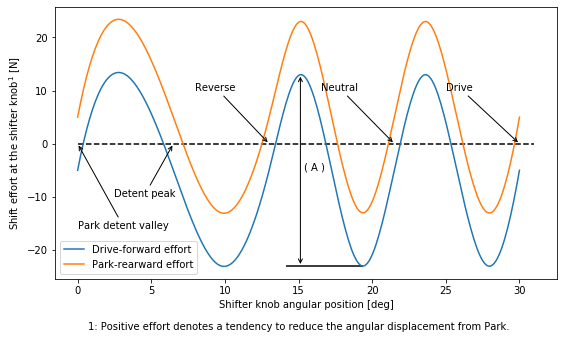

In [83]:
from scipy.interpolate import make_interp_spline, BSpline

xnew = np.linspace(0,30,300)
spl = make_interp_spline(manual_theta, manual_effort, k=3)
effort_smooth = spl(xnew)
fore_effort = []
aft_effort = []
for y in effort_smooth:
    fore_effort.append(y+friction/2)
    aft_effort.append(y-friction/2)

fig2,ax2 = plt.subplots(1,1,figsize=(9,5))
ax2.set_ylabel("Shift effort at the shifter knob$^1$ [N]")
ax2.set_xlabel("Shifter knob angular position [deg]")
#ax2.get_yaxis().set_ticks([])

ax2.plot(xnew,aft_effort,xnew,fore_effort)
# note that plot elements defined prior to the legend are included, elements
# that are defined afterwards are excluded.

ax2.legend(("Drive-forward effort","Park-rearward effort"))

ax2.hlines(0,0,31,'black','dashed')

# Plot annotations
ax2.annotate(s='Detent peak',
             xy=(P_R_breakover,0),
             xytext=(2.5,-10),
             arrowprops=dict(arrowstyle='->'))

ax2.annotate(s='Park detent valley',
            xy=(park_position,0),
            xytext=(0,-16),
            arrowprops=dict(arrowstyle='->'))

ax2.annotate(s='Reverse',
            xy=(reverse_position,0),
            xytext=(reverse_position-5,10),
            arrowprops=dict(arrowstyle='->'))

ax2.annotate(s='Neutral',
            xy=(neutral_position,0),
            xytext=(neutral_position-5,10),
            arrowprops=dict(arrowstyle='->'))

ax2.annotate(s='Drive',
            xy=(drive_position,0),
            xytext=(drive_position-5,10),
            arrowprops=dict(arrowstyle='->'))

# Plot caption including footnote
text = "1: Positive effort denotes a tendency to reduce the angular displacement from Park."
ax2.text(15,-35,text, ha='center')

# Amplitude measurement annotation
effort_max = Reverse_peak-friction/2
effort_min = -1*Reverse_peak-friction/2
ax2.annotate(s='',
            xy=(R_neg,effort_min),
            xytext=(R_neg,effort_max),
            arrowprops=dict(arrowstyle='<->'))
ax2.hlines(effort_min,R_neg-1,R_pos)
ax2.annotate(s='( A )',
             xy=(R_neg+0.25,((effort_max)+(effort_min))/2))

# Friction measurement annotation

